#PRINCIPLE OF DATA ANALYSIS AND DESIGN OF EXPERIMENTS

##**Homework 2**: Model Selection and Goodness of Fit Problem Set

###Muhammad A. Alam
###Purdue University

In [ ]:
from google.colab import drive
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import kstest
from scipy.stats import norm
import scipy.stats as ss


drive.mount('/content/gdrive', force_remount=True)
os.chdir("/content/gdrive/MyDrive/ECE595_/")

data = np.loadtxt("HW2.csv",dtype=float, skiprows=1,delimiter=',')

Temp,R = (data[:,0],data[:,1])
788
print('Temp: ',Temp,"\n\n","Resistance: ",R)




Mounted at /content/gdrive
Temp:  [150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270. 280.
 290. 300. 310. 320. 330. 340. 350.] 

 Resistance:  [19.5 18.4 20.2 20.1 20.9 20.8 21.2 21.8 21.9 23.6 23.2 23.9 23.2 24.1
 24.2 26.3 25.5 26.1 26.3 27.1 28. ]


#1.) Comparing the “goodness-of-fit” between two types of fitting. Consider the temperature-dependent resistance data included in HW2.csv

We will fit two models: 𝑦 = a + b𝑥 and 𝑦 = c + d𝑥 + f𝑥^2 to determine the model that fits the data better.

a.) what is the value of b

In [ ]:
def func1(x, a, b):
  return a + b*x


def func2(x, c, d, f):
  return c + d*x + f*x**2



In [ ]:

# creating a list of column names
column_values = ['Temp', 'R']

# creating the dataframe
df1 = pd.DataFrame(data = data,
                  columns = column_values)

# displaying the dataframe
print(df1)




     Temp     R
0   150.0  19.5
1   160.0  18.4
2   170.0  20.2
3   180.0  20.1
4   190.0  20.9
5   200.0  20.8
6   210.0  21.2
7   220.0  21.8
8   230.0  21.9
9   240.0  23.6
10  250.0  23.2
11  260.0  23.9
12  270.0  23.2
13  280.0  24.1
14  290.0  24.2
15  300.0  26.3
16  310.0  25.5
17  320.0  26.1
18  330.0  26.3
19  340.0  27.1
20  350.0  28.0


In [ ]:
x=df1[['Temp']]
y=df1['R']

In [ ]:
x=sm.add_constant(x)         # Linear model (y= a+bx)
model1=sm.OLS(y,x).fit()
model1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     505.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.73e-15
Time:                        23:28:45   Log-Likelihood:                -15.429
No. Observations:                  21   AIC:                             34.86
Df Residuals:                      19   BIC:                             36.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4104      0.492     25.243      0.000      11.381      13.439
Temp           0.0430      0.002     22.491      0.000       0.039       0.047
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   2.578
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.484
Skew:                           0.194   Prob(JB):                        0.785
Kurtosis:                       2.366   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c) What is the value of AIC for the quadratic
fitting? Recall that 𝐴𝐼𝐶 = 𝑛 𝑙𝑛 (SSR) + 2𝑀

In [ ]:
Temp2=Temp*Temp                 #Quadratic fitting, y=c+d*x+f*X^2
df1['Temp^2']=Temp2
x2=df1[['Temp','Temp^2']]
x2=sm.add_constant(x2)
model2=sm.OLS(y,x2).fit()
model2.summary()
# from the summary below we get AIC=36.23


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     247.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           8.15e-14
Time:                        23:28:51   Log-Likelihood:                -15.113
No. Observations:                  21   AIC:                             36.23
Df Residuals:                      18   BIC:                             39.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9735      2.166      6.450      0.000       9.422      18.525
Temp           0.0297      0.018      1.648      0.117      -0.008       0.068
Temp^2      2.657e-05   3.58e-05      0.741      0.468   -4.87e-05       0.000
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   2.635
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.181
Skew:                           0.209   Prob(JB):                        0.913
Kurtosis:                       2.820   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

d) Which model is better in terms of R^2 ?

**ANS.** From the two summary above the quadratic model has better R^2





e) Which model is better in terms of adjusted R^2?

**ANS.** From the summaries above, the linear fit model has better adjusted R^2.

f) What model should you choose based on the theory of goodness of fit?

**Ans**: The linear model i.e. a+bx should be chosen according to theory of goodness of fit as it is simpler model with higher R^2 adjusted and AIC values.


2. Goodness of fit by Q-Q Plot
Consider the following voltage dataset: 7.19, 6.31, 5.89, 4.5, 3.77, 4.25, 5.19, 5.79, 6.79.. There are 9 data points, therefore let us consider a decile plot.

In [ ]:
V = np.array([7.19,6.31, 5.89, 4.5, 3.77, 4.25, 5.19, 5.79, 6.79])

(a) Use Hazen cdf formula 𝑓 = 𝑖/(𝑛 + 1) to determine the position of the 𝑖-th sample. What is
the 𝑓5?

In [ ]:
f=list()
V=np.sort(V)
for i in range(1,10):
  f.append(i/10)
f                        #f5=0.5

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Next we use the inverse formula, 𝑞i = 4.91(𝑓i^0.14 − (1 − 𝑓i)^0.14 to locate position of the
location of the samples points, if they are Normally distributed. What is 𝑞5?

[-1.281126151038121, -0.8395272278614687, -0.5224630525257601, -0.2522528662220316, 0.0, 0.2522528662220316, 0.5224630525257601, 0.8395272278614687, 1.281126151038121]


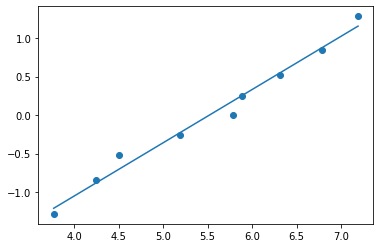

In [ ]:
q=[]
for i in range(0,9):
  q.append((4.91*(f[i]**0.14-(1-f[i])**0.14)))
print(q)
a,b=np.polyfit(V,q,1)
plt.scatter(V,q,marker="o")
plt.plot(V,b+a*V)
#q5=0

Then we plot the sorted voltages observed in experiment (as the x-axis) vs. 𝑞𝑖 (as the y-axis) to see if there  is straight line correlation. A straight line fit by Wolfram alpha gives 𝑦 = 0.69𝑥 − 3.80

c.) What is the R^2?

In [ ]:
q=np.array(q)
model=LinearRegression()
V2=V.reshape(-1,1)
model.fit(V2,q)
print(f'R^2={model.score(V2,q)}')


R^2=0.9825855644541203


Based on the correlation coefficient table, is the linear line (and by extension Normal distribution) a good fit?

In [ ]:
np.corrcoef(V,q)

array([[1.        , 0.99125454],
       [0.99125454, 1.        ]])

**Ans:** Correlation Coefficient=0.9912. Referring the table, at significance level of 0.05 the critical value of correleation coefficient for df=7 is 0.66 which is lower than the calculated value. hence this is not a good fit.

Determine 𝐷9 for Kolmogorov-Smirnov Test.

In [ ]:
kstest(V,"norm" )  #KS test to check if the voltage data comes from normal distribution


KstestResult(statistic=0.9999183762262973, pvalue=3.2164738280608494e-37)

Compared to 𝐷𝑐𝑟𝑖𝑡(n=9), would you say it is a good fit?

**Ans:**Dcrit(n=9)=0.430 at a significance level of 0.05 which is less than D(n=9)= 0.99. Hence this is not a good fit and the sample does not come from normal distribution.